# Using Decision Treem model over Iris Dataset

In [2]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [5]:
# Reading the Iris_Dataset.csv file
iris_data = pd.read_csv("Iris_Dataset.csv")

In [6]:
# Basic information regarding iris data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris_data.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

As we saw that each classes has equal number of data points then our Iris data said to be Balanced dataset. No Class is fully dominating in our dataset.

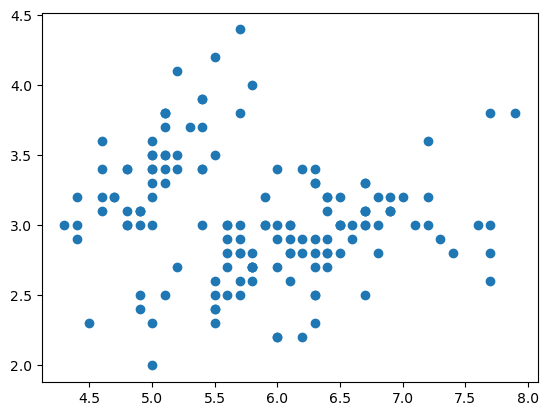

In [17]:
# Visualizing iris data
plt.scatter(iris_data['sepal-length'],iris_data['sepal-width'])
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


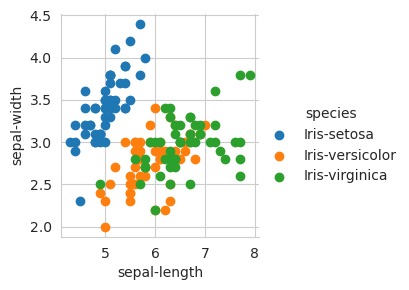

In [19]:
# using seaborn lib to visualized 2 features based om target variable
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue = 'species') \
   .map(plt.scatter, 'sepal-length','sepal-width') \
   .add_legend()
plt.show()

By looking the Scatter plot we can say that all bluepoints(Iris-setosa) are separated perfectly as compare to orange(versicolor) or green(virginica) points for features(sepal-length, sepal-width)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


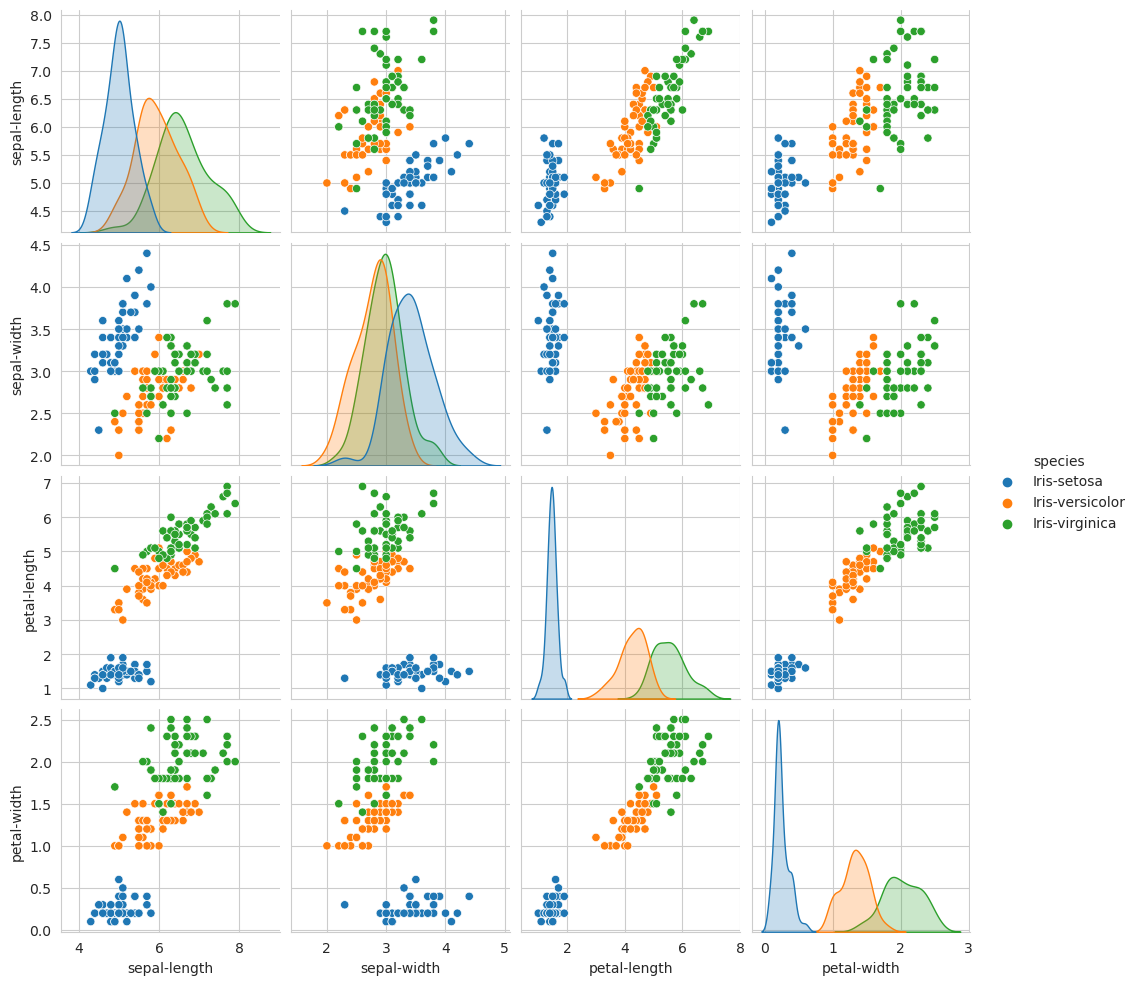

In [22]:
# pair plot gives relationship b/w all features distribution with each other
sns.pairplot(iris_data, hue='species')
plt.show()

By looking the result of pair plot we sure that all blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.

In pair plot we saw that their are some feature combination which has very less overlapping b/w Versicolor and verginica, that's means those feature are very important for our classification task purpose.

In [25]:
# Just exploring new features with given data
iris_data['sepal_diff'] = iris_data['sepal-length'] - iris_data['sepal-width']
iris_data['petal_diff'] = iris_data['petal-length'] - iris_data['petal-width']
iris_data

,sepal-length,sepal-width,petal-length,petal-width,species,sepal_diff,petal_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


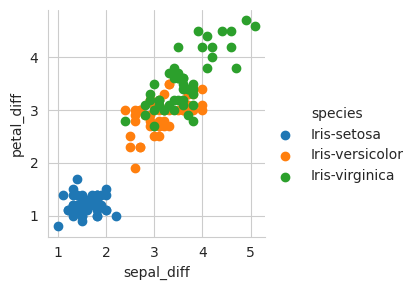

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

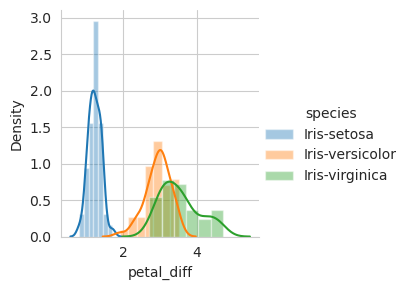

In [27]:
#Analysed new feature to get some more infomation apart form existing ones...

sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='species')\
   .map(plt.scatter,'sepal_diff','petal_diff')\
   .add_legend()
plt.show() 

sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='species')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show()

In [29]:
iris_data['sepal_petal_len_diff'] = iris_data['sepal-length'] - iris_data['petal-length']
iris_data['sepal_petal_width_diff'] = iris_data['sepal-width'] - iris_data['petal-width']
iris_data

,sepal-length,sepal-width,petal-length,petal-width,species,sepal_diff,petal_diff,sepal_petal_len_diff,sepal_petal_width_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


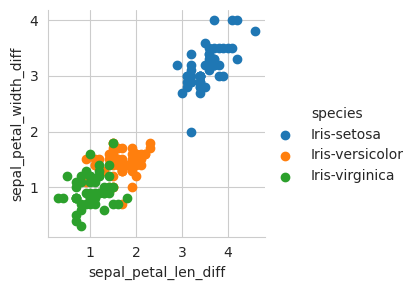

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

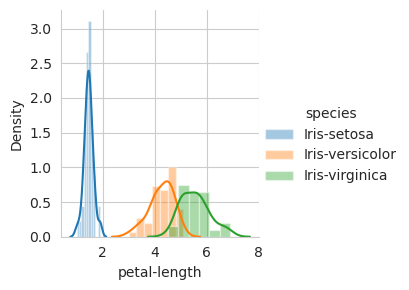

In [31]:
#Analysed new feature to get some more infomation apart form existing ones...

sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='species')\
   .map(plt.scatter,'sepal_petal_len_diff','sepal_petal_width_diff')\
   .add_legend()
plt.show() 

sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='species')\
   .map(sns.distplot,'petal-length')\
   .add_legend()
plt.show()

In [32]:
iris_data['sepal_petal_len_wid_diff'] = iris_data['sepal-length'] - iris_data['petal-width']
iris_data['sepal_petal_wid_len_diff'] = iris_data['sepal-width'] - iris_data['petal-length']
iris_data

,sepal-length,sepal-width,petal-length,petal-width,species,sepal_diff,petal_diff,sepal_petal_len_diff,sepal_petal_width_diff,sepal_petal_len_wid_diff,sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


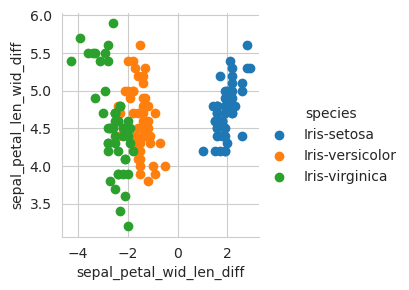

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

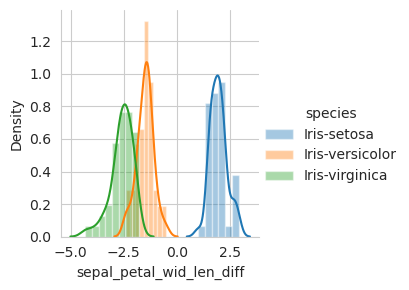

In [35]:
#Analysed new feature to get some more infomation apart form existing ones...

sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='species')\
   .map(plt.scatter,'sepal_petal_wid_len_diff','sepal_petal_len_wid_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='species')\
   .map(sns.distplot,'sepal_petal_wid_len_diff')\
   .add_legend()
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


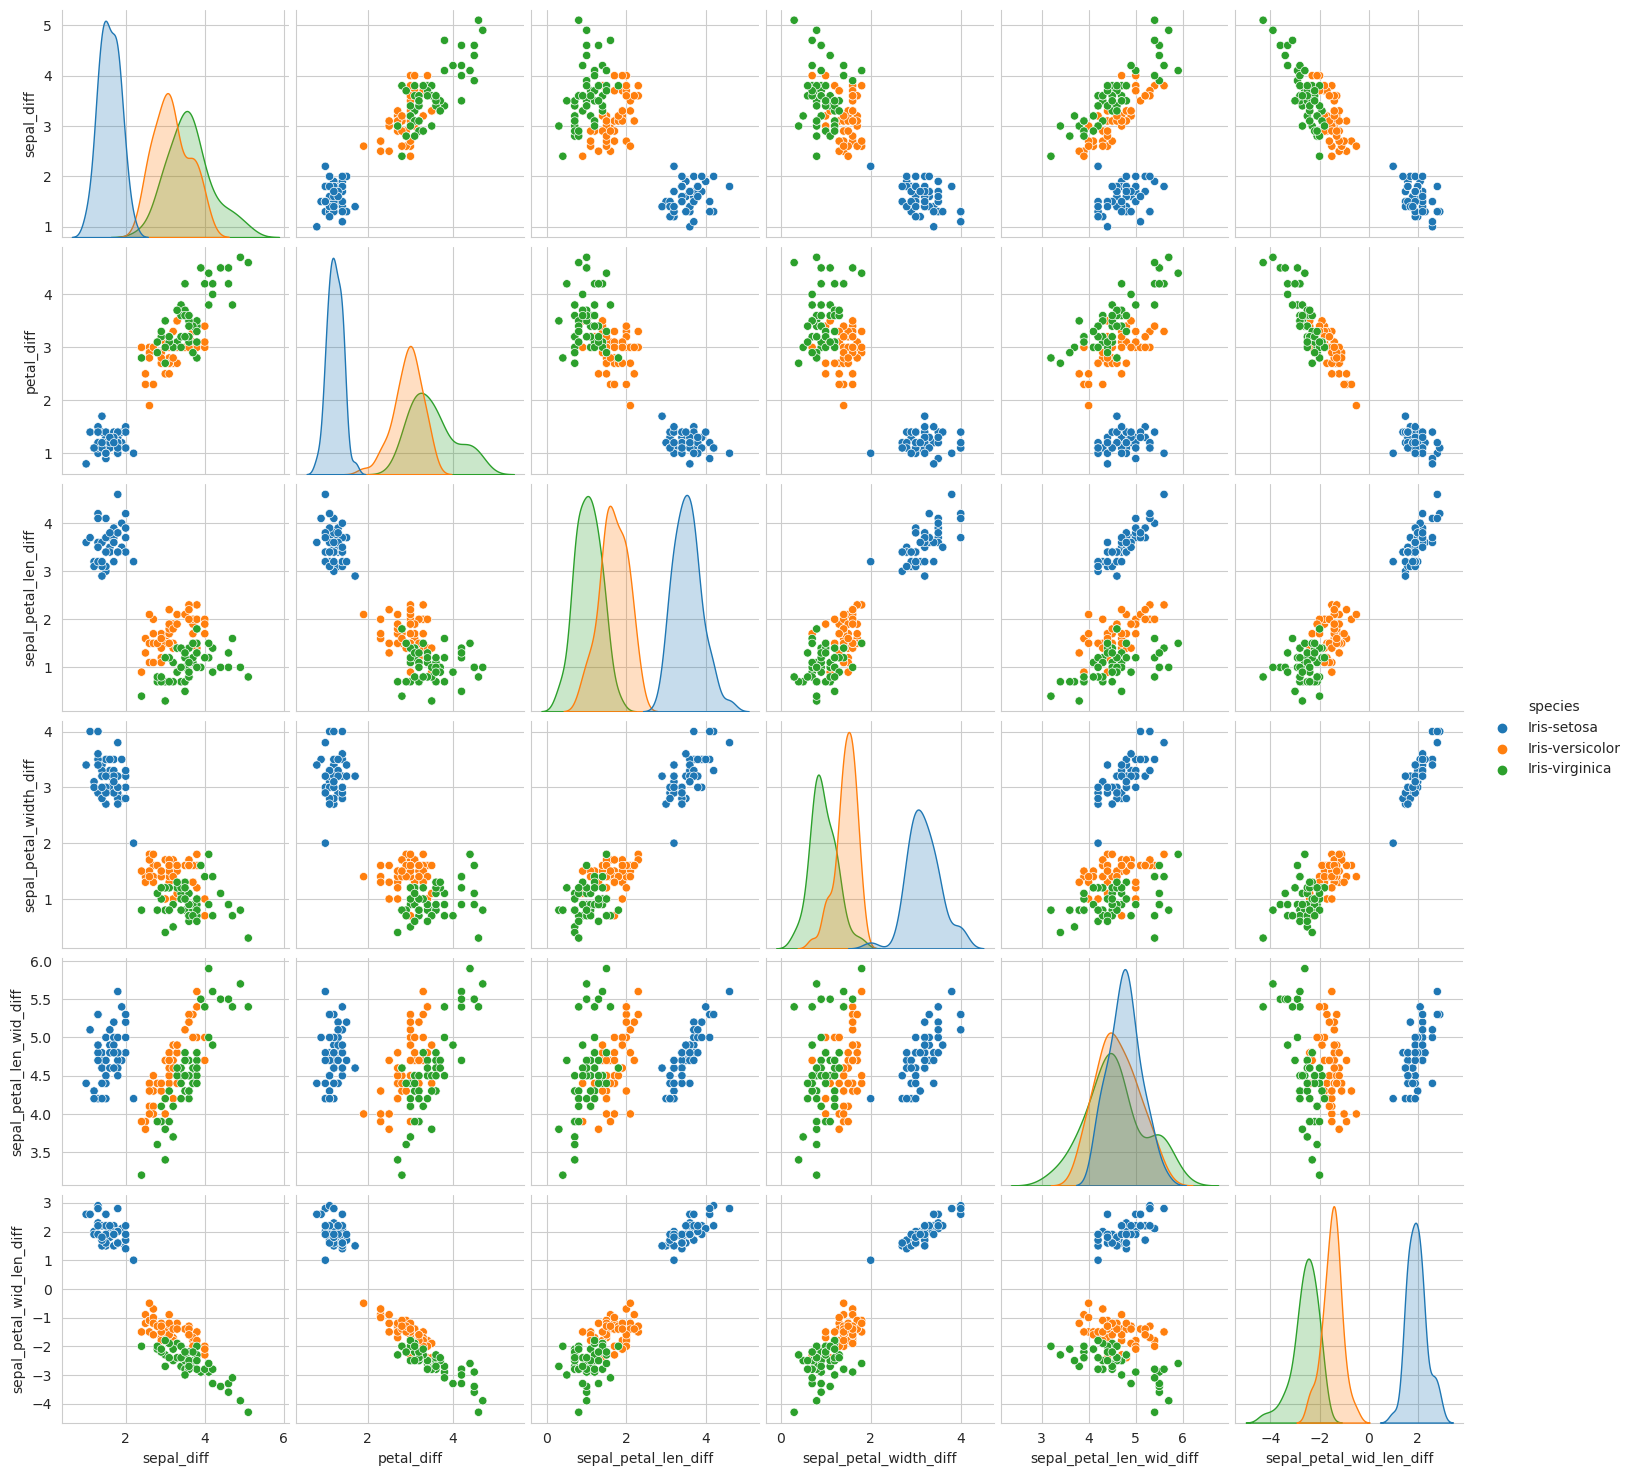

In [38]:
# Finding relationship b/w new feature based on class labels...

sns.pairplot(iris_data[['species', 'sepal_diff', 'petal_diff', 'sepal_petal_len_diff',\
                        'sepal_petal_width_diff', 'sepal_petal_len_wid_diff',\
                        'sepal_petal_wid_len_diff']], hue='species')
plt.show()

With help of Pair plot we are getting some new information but it is more likely similar with our main data features as we saw earlier.

Every combination well separate the Iris-setosa but has some overlapped b/w Versicolor and virginica.

Checking distribution plot for each feature in dataset for each class label

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

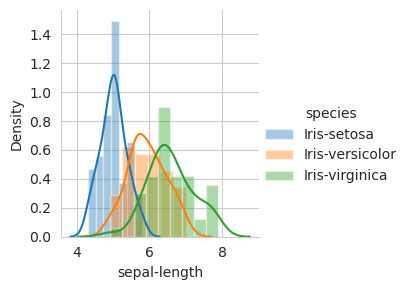

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

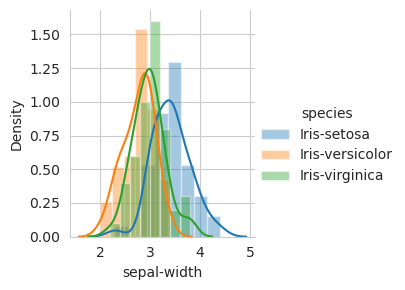

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

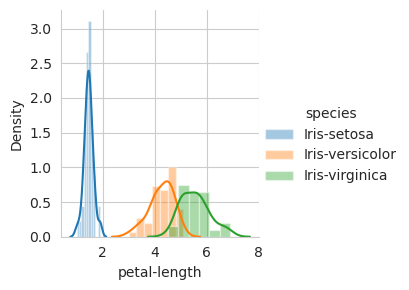

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

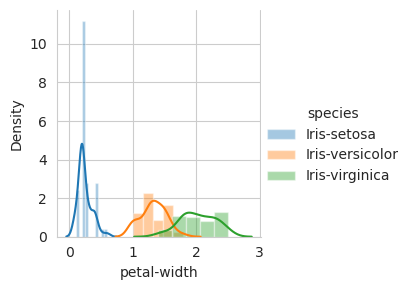

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

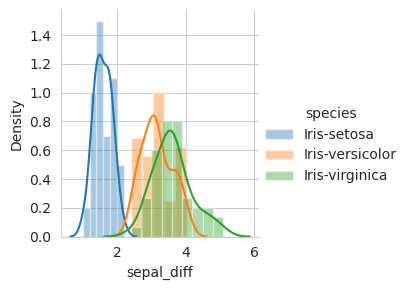

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

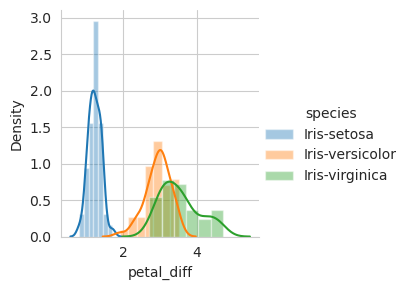

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

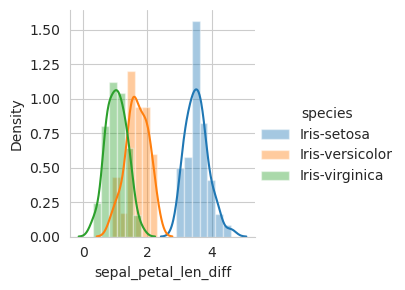

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

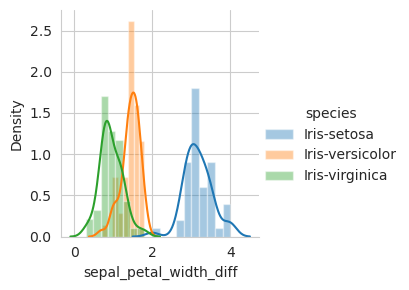

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

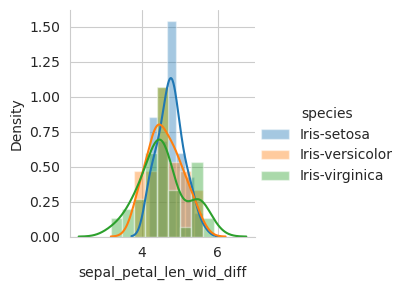

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

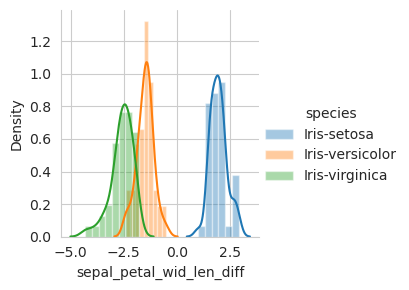

In [42]:
# Exploring distribution plot for all features

for i in iris_data.columns:
    if i == 'species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(iris_data, hue='species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

# Building Classification Model

In [45]:
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,species,sepal_diff,petal_diff,sepal_petal_len_diff,sepal_petal_width_diff,sepal_petal_len_wid_diff,sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2


In [47]:
# here are we separating independent variable or target variable from iris_data
X = iris_data[['sepal-length','sepal-width','petal-length','petal-width']]
Y = iris_data['species']

In [49]:
# before training model, we have split our data into Actual Train and Actual Test Dataset for training & Validating purpose
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [51]:
# spliting data into validation train & validation test
Xt, Xcv, Yt, Ycv = train_test_split(X_train, Y_train, test_size = 0.10, random_state = 42)

In [53]:
# Now we have create a Decision Tree classifier and trained it with training dataset...
iris_clf = DecisionTreeClassifier(criterion = 'gini',min_samples_split = 2)
iris_clf.fit(Xt,Yt)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.2222222222222222, 0.7857142857142857, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.4444444444444444, 0.7857142857142857, 'x[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.5555555555555556, 0.5, 'x[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.4444444444444444, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.6666666666666666, 0.35714285714285715, 'x[3] <= 1.75\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text

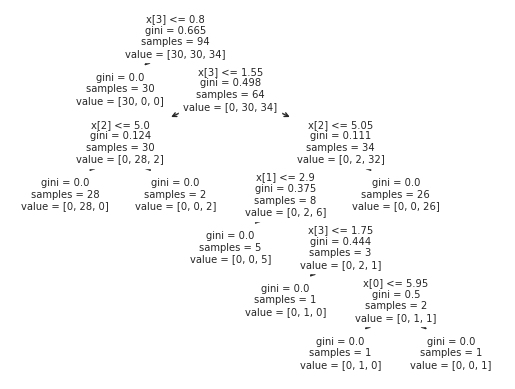

In [55]:
# Visualized the Tree which is formed on train dataset
tree.plot_tree(iris_clf)

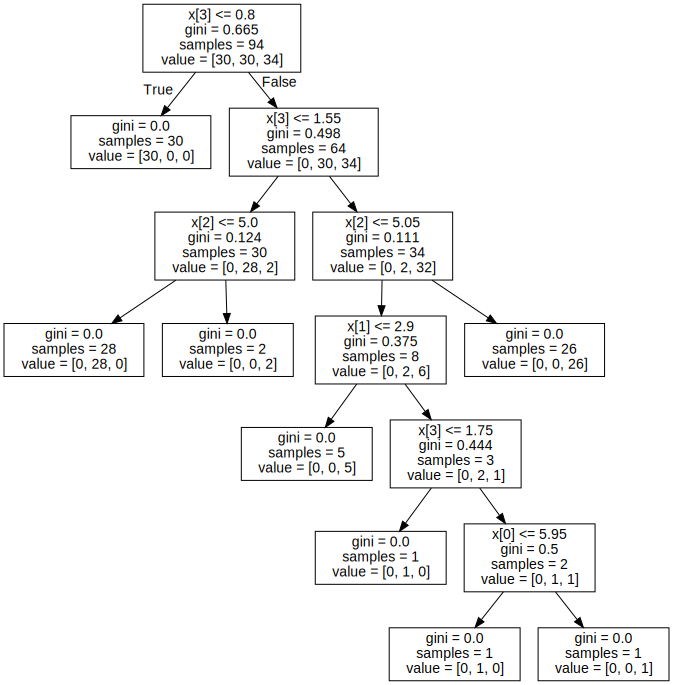

In [57]:
# visualizing decision tree using graphviz lib
dot_data = tree.export_graphviz(iris_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [59]:
# As our model has been trained….
# Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.
print('Accuracy Score is : ',cross_val_score(iris_clf, Xt, Yt, cv = 3, scoring = 'accuracy').mean())

Accuracy Score is :  0.9361559139784946


In [61]:
# checking validation test data on our trained model & getting performance metrics
Y_hat = iris_clf.predict(Xcv)

print('Accuracy score for validation test data is: ',accuracy_score(Ycv,Y_hat))
multilabel_confusion_matrix(Ycv, Y_hat)

Accuracy score for validation test data is:  0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [63]:
# Checking our model performance on actual unseen test data
Yt_hat = iris_clf.predict(X_test)
Yt_hat

print('Model Accuracy score on totally unseen data(Xtest) is: ', accuracy_score(Y_test,Yt_hat)*100,'%')
multilabel_confusion_matrix(Y_test, Yt_hat)

Model Accuracy score on totally unseen data(Xtest) is:  100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

As we know our selected feature are working well and model gives very good accuracy score on validate or actual test data. So Now we can trained our model on Actual train dataset with selected features for evaluating/ deploying our model in real world cases.

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

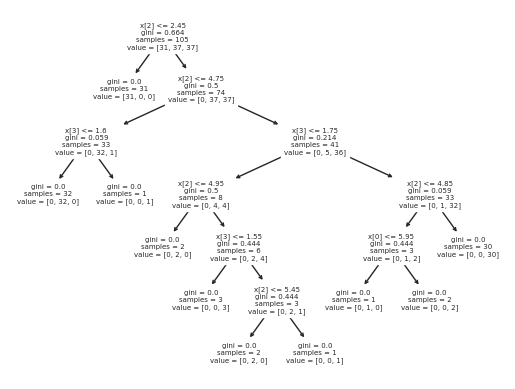

In [66]:
# Training model on Actal train data
iris_fclf = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)
iris_fclf.fit(X_train, Y_train)

# Visualize tree structure
tree.plot_tree(iris_fclf)

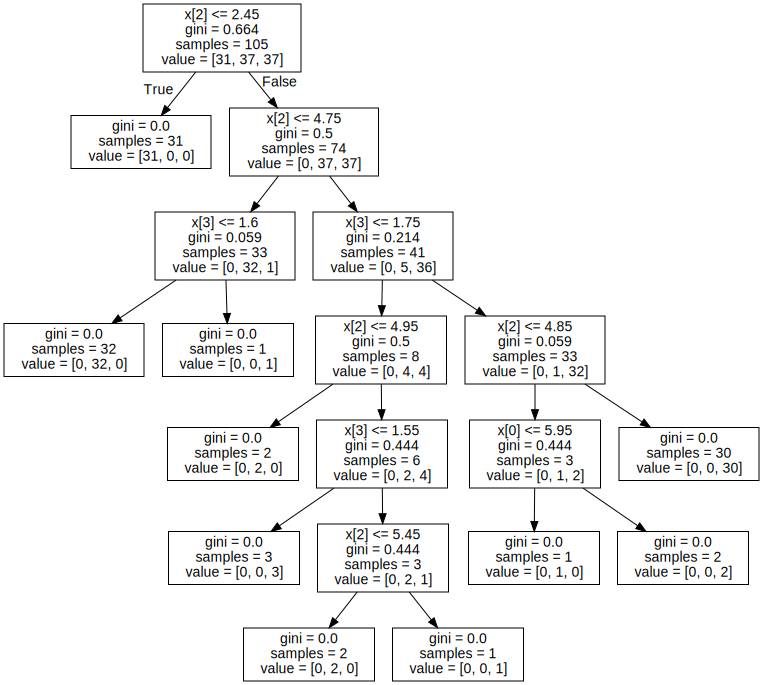

In [68]:
# Final Decision tree build for deploying in real world cases

dot_data = tree.export_graphviz(iris_fclf, out_file = None)
graph = graphviz.Source(dot_data)
graph

In [70]:
# Checking our model performance on actual test data
Yt_fhat = iris_clf.predict(X_test)
Yt_fhat

print('Model Accuracy score on totally unseen data(Xtest) is: ', accuracy_score(Y_test,Yt_fhat)*100,'%')
multilabel_confusion_matrix(Y_test, Yt_hat)

Model Accuracy score on totally unseen data(Xtest) is:  100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

In [80]:
# Testing our new points except from Dataset
test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(iris_fclf.predict(test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
